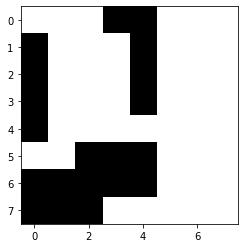

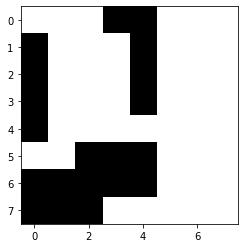

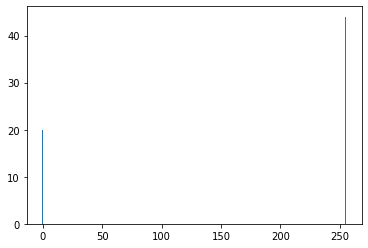


11100111
01110111
01110111
01110111
01111111
11000111
00000111
000111110 3 type 3,0 4 type 1,
1 0 type 3,1 4 type 2,
2 0 type 2,2 4 type 2,
3 0 type 2,3 4 type 2,
4 0 type 2,
5 2 type 3,5 3 type 1,5 4 type 1,
6 0 type 3,6 1 type 1,6 2 type 1,6 2 type 2,6 3 type 1,6 3 type 2,6 4 type 1,6 4 type 2,
7 0 type 2,7 1 type 1,7 1 type 2,7 2 type 1,7 2 type 2,

11122111
31112111
31112111
31112111
31111111
11444111
55555111
55511111
2 par--> 2,2 par--> 2,
3 par--> 3,2 par--> 2,
3 par--> 3,2 par--> 2,
3 par--> 3,2 par--> 2,
3 par--> 3,
4 par--> 4,4 par--> 4,4 par--> 4,
5 par--> 4,5 par--> 4,5 par--> 4,5 par--> 4,5 par--> 4,
5 par--> 4,5 par--> 4,5 par--> 4,
11122111
31112111
31112111
31112111
31111111
11444111
44444111
44411111finished all image processing


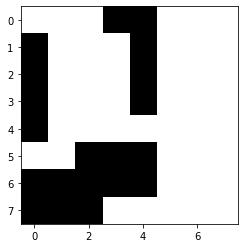

In [5]:
import cv2
import math, sys
import matplotlib.pyplot as plt

'''
savefig sould be done before show
see: https://blog.csdn.net/u010099080/article/details/52912439
'''

sys.setrecursionlimit(1000000)

####### hist part ########
def img_hist(img_in):    
    hist = []
    for i in range(256):
        hist.append(0)
    
    row, col= img_in.shape
    for i in range(0, row):
        for j in range(0, col):
            hist[img_in[i, j]] += 1
    
    plt.bar(range(0, 256), hist)
    plt.savefig('histogram.png') 
    plt.show()
    return 0

####### binarize part ######
def img_binarize(img_in):
    return (img_in > 0x7f) * 0xff

########## IO ##############
img = cv2.imread('lena_2.bmp', 0)
plt.imshow(img, cmap = 'gray')
plt.show()

img_binarized = img_binarize(img)
plt.imshow(img_binarized, cmap = 'gray')
plt.savefig('lena_binarized.png', cmap = 'gray')
plt.show()

img_hist(img)

######### CC part ##########
cc_img = (img_binarized == 0xff) * 1
parent_label = []

def union_find(label):
    original_label = label
    while label != parent_label[label]:
        label = parent_label[parent_label[label]]
        
    parent_label[original_label] = label # path compression to avoid TLE
    return label
            
def connected_components():
    # set parent label
    plt.imshow(cc_img, cmap = 'gray')
    row, col = cc_img.shape
    for i in range(row * col):
        parent_label.append(i)

    
    for i in range(row):
        print()
        for j in range(col):
            print(cc_img[i, j], end = '')
        
    
    # do connected components
    label = 2
    for i in range(row):
        for j in range(col):
            ok1 = 0
            ok2 = 0
            if cc_img[i, j] == 0:
                if j - 1 >= 0 and cc_img[i, j - 1] > 1: # left has already labeled
                    print(i, j, 'type 1,', end = '')
                    cc_img[i, j] = cc_img[i, j - 1]
                    ok1 = 1
                    
                if i - 1 >= 0 and cc_img[i - 1, j] > 1: # up has already labeled
                    print(i, j, 'type 2,', end = '')
                    if ok1: # set the connected component to make left = up
                        parent_label[cc_img[i, j]] = parent_label[cc_img[i - 1, j]]
                    else:
                        cc_img[i, j] = cc_img[i - 1, j] # just set as the same label as above
                    
                    ok2 = 1
                if ok2 == 0 and ok1 == 0:
                    print(i, j, 'type 3,', end = '')
                    cc_img[i, j] = label
                    label += 1
        print()
                
    for i in range(row):
        print()
        for j in range(col):
            print(cc_img[i, j], end = '')
        
    
    # union and find merging
    for i in range(row):
        print()
        for j in range(col):
            if cc_img[i, j] > 1:
                print('%d par--> %d,' %(cc_img[i, j], union_find(cc_img[i, j])), end = '')
                cc_img[i, j] = union_find(cc_img[i, j])
        
                
    for i in range(row):
        print()
        for j in range(col):
            print(cc_img[i, j], end = '')
        
    mymap = []
    for i in range(0, row * col):
        mymap.append(0)
        
    for i in range(0, row):
        for j in range(0, col):
            mymap[cc_img[i, j]] += 1
    
    #print(mymap)
    return 0

connected_components()
print('finished all image processing')